***Coding Assignment: Fraudulent Loan Application Detection***

Build a machine learning model to predict whether a loan application is fraudulent based on
historical data.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

***Data Loading***

Here we are considering Kaggle competitions data set "https://www.kaggle.com/competitions/GiveMeSomeCredit/data"

In [2]:
train_data = pd.read_csv("data/cs-training.csv")
train_data.head()

,Unnamed:0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [3]:
#Let us remove unnamed column because it is representing only index values and does not impact the model.
train_data = pd.read_csv("data/cs-training.csv").drop(['Unnamed:0'],axis=1)
train_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


***Exploratory Data Analysis***

EDA is helpful to perform the detailed analysis on dataset 

1.Treating duplicates

In [4]:
train_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
149995    False
149996    False
149997    False
149998    False
149999    False
Length: 150000, dtype: bool

In [5]:
train_data.duplicated().sum()

609

In [6]:
train_data.duplicated().value_counts()

False    149391
True        609
dtype: int64

In [7]:
trainset_no_duplicates = train_data.drop_duplicates()

In [8]:
trainset_no_duplicates.duplicated().sum()

0

2. Treating Null Values

In [9]:
trainset_no_duplicates.isnull()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149995,False,False,False,False,False,False,False,False,False,False,False
149996,False,False,False,False,False,False,False,False,False,False,False
149997,False,False,False,False,False,True,False,False,False,False,False
149998,False,False,False,False,False,False,False,False,False,False,False


In [10]:
trainset_no_duplicates.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [11]:
round(trainset_no_duplicates.isnull().sum()/trainset_no_duplicates.shape[0]*100,1)

SeriousDlqin2yrs                         0.0
RevolvingUtilizationOfUnsecuredLines     0.0
age                                      0.0
NumberOfTime30-59DaysPastDueNotWorse     0.0
DebtRatio                                0.0
MonthlyIncome                           19.6
NumberOfOpenCreditLinesAndLoans          0.0
NumberOfTimes90DaysLate                  0.0
NumberRealEstateLoansOrLines             0.0
NumberOfTime60-89DaysPastDueNotWorse     0.0
NumberOfDependents                       2.6
dtype: float64

In [12]:
#Function to create a missing values
def findmissvalues(df):
    return round(df.isnull().sum()/df.shape[0]*100,1)


In [13]:
findmissvalues(trainset_no_duplicates)

SeriousDlqin2yrs                         0.0
RevolvingUtilizationOfUnsecuredLines     0.0
age                                      0.0
NumberOfTime30-59DaysPastDueNotWorse     0.0
DebtRatio                                0.0
MonthlyIncome                           19.6
NumberOfOpenCreditLinesAndLoans          0.0
NumberOfTimes90DaysLate                  0.0
NumberRealEstateLoansOrLines             0.0
NumberOfTime60-89DaysPastDueNotWorse     0.0
NumberOfDependents                       2.6
dtype: float64

In [14]:
#Firstly we are handling NumberOfDependents column.
trainset_no_duplicates.NumberOfDependents.isnull().sum()

3828

In [15]:
trainset_no_duplicates[trainset_no_duplicates.NumberOfDependents.isnull()]


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
8,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
96,0,0.542243,48,2,10.0,NaN,2,0,0,0,NaN
109,0,0.041258,61,0,4739.0,NaN,11,0,4,0,NaN
159,0,0.000000,63,0,2.0,NaN,4,0,0,0,NaN
238,0,1.000000,28,0,0.0,NaN,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
149826,0,0.027319,71,0,1419.0,NaN,13,0,1,0,NaN
149854,0,0.056589,75,0,8.0,NaN,3,0,0,0,NaN
149894,0,0.017904,55,0,1058.0,NaN,8,0,1,1,NaN
149948,0,0.055530,27,0,10.0,NaN,1,0,0,0,NaN


In [16]:
#Let us check for Number of Dependents and Monthly Income relationship
trainset_no_duplicates[trainset_no_duplicates.NumberOfDependents.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,0.0,3828.000000,3828.000000,3828.000000,3828.000000,0.0
mean,0.046499,11.003369,59.741641,0.572623,1110.713689,NaN,5.708986,0.497126,0.605799,0.474138,NaN
std,0.210592,240.656436,18.345175,6.527320,4235.410634,NaN,4.086337,6.523199,0.920990,6.520343,NaN
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.009228,48.000000,0.000000,25.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.047670,61.000000,0.000000,398.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.259028,74.000000,0.000000,1587.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


In [17]:
trainset_no_duplicates[trainset_no_duplicates.MonthlyIncome.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,0.0,29221.000000,29221.000000,29221.000000,29221.000000,25393.000000
mean,0.056603,6.757056,56.395127,0.452483,1702.565005,NaN,7.314192,0.355224,0.886691,0.323398,0.321309
std,0.231087,219.705933,15.293975,5.145292,4279.494336,NaN,4.821894,5.136737,1.036795,5.125615,0.815421
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016851,46.000000,0.000000,155.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081840,57.000000,0.000000,1198.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.428256,67.000000,0.000000,2407.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [18]:
#Let us treat Number of Dependents with aggregate function mode
trainset_no_duplicates['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In [19]:
trainset_no_duplicates.groupby(['NumberOfDependents']).size()

NumberOfDependents
0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

In [20]:
#Let us divide the data frame in two, one with null values in NumberOfDependents and Monthly income. Other data frame has rest of the all
data_depmiss=trainset_no_duplicates[trainset_no_duplicates.NumberOfDependents.isnull()]
data_nodepmiss=trainset_no_duplicates[trainset_no_duplicates.NumberOfDependents.notnull()]

In [21]:
data_depmiss.shape

(3828, 11)

In [22]:
data_nodepmiss.shape

(145563, 11)

In [23]:
#Filling all the missing values in data_depmiss with 0
data_depmiss['NumberOfDependents'] = data_depmiss['NumberOfDependents'].fillna(0)
data_depmiss['MonthlyIncome'] = data_depmiss['MonthlyIncome'].fillna(0)

C:\Users\SAI\AppData\Local\Temp\ipykernel_10756\3828797860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_depmiss['NumberOfDependents'] = data_depmiss['NumberOfDependents'].fillna(0)
C:\Users\SAI\AppData\Local\Temp\ipykernel_10756\3828797860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_depmiss['MonthlyIncome'] = data_depmiss['MonthlyIncome'].fillna(0)


In [24]:
#Let us check where there are any missing values in data_depmiss.
data_depmiss.NumberOfDependents.isnull().sum()

0

In [25]:
data_depmiss.MonthlyIncome.isnull().sum()

0

In [26]:
findmissvalues(data_depmiss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [27]:
#Let us start working on rest of the people who not mention about their monthly income.
findmissvalues(data_nodepmiss)

SeriousDlqin2yrs                         0.0
RevolvingUtilizationOfUnsecuredLines     0.0
age                                      0.0
NumberOfTime30-59DaysPastDueNotWorse     0.0
DebtRatio                                0.0
MonthlyIncome                           17.4
NumberOfOpenCreditLinesAndLoans          0.0
NumberOfTimes90DaysLate                  0.0
NumberRealEstateLoansOrLines             0.0
NumberOfTime60-89DaysPastDueNotWorse     0.0
NumberOfDependents                       0.0
dtype: float64

In [28]:
data_nodepmiss['MonthlyIncome'].agg(['mean','median','min'])

mean      6675.098269
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [29]:
data_nodepmiss['MonthlyIncome'].agg(['max'])

max    3008750.0
Name: MonthlyIncome, dtype: float64

In [30]:
#let us fill null values with median.
data_nodepmiss['MonthlyIncome'] = data_nodepmiss['MonthlyIncome'].fillna(data_nodepmiss['MonthlyIncome'].median())

C:\Users\SAI\AppData\Local\Temp\ipykernel_10756\1987553985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nodepmiss['MonthlyIncome'] = data_nodepmiss['MonthlyIncome'].fillna(data_nodepmiss['MonthlyIncome'].median())


In [31]:
findmissvalues(data_nodepmiss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [32]:
#Let us merge both the data frames.
training_dataset= data_nodepmiss.append(data_depmiss)

C:\Users\SAI\AppData\Local\Temp\ipykernel_10756\16390903.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  training_dataset= data_nodepmiss.append(data_depmiss)


In [33]:
training_dataset.shape

(149391, 11)

In [34]:
#Let us finally check once again for null values.
findmissvalues(training_dataset)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [35]:
training_dataset.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


3. Statistical Analysis
#Performing the analysis using the dataset that without any missing values. Here we will be performing the satistical analysis, visualizations and hypothesis testing.

In [36]:
#finding ratio of defaulters and non defaulters
training_dataset.groupby(['SeriousDlqin2yrs']).size()/ training_dataset.shape[0]*100

SeriousDlqin2yrs
0    93.300132
1     6.699868
dtype: float64

In [37]:
#Let us start working on each and every feature.
training_dataset.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [38]:
(training_dataset[training_dataset['RevolvingUtilizationOfUnsecuredLines']>10]).groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    224
1     17
dtype: int64

In [39]:
(training_dataset[training_dataset['RevolvingUtilizationOfUnsecuredLines']>10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,7310.817427,5.763485,0.074689,1.186722,0.087137,0.651452
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,5964.524303,3.114160,0.579711,1.065750,0.559651,1.022093
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In [40]:
# Let us remove the rows in which RevolvingUtilizationOfUnsecuredLines is greater than 10.
training_dataset_rm= training_dataset.drop((training_dataset[training_dataset['RevolvingUtilizationOfUnsecuredLines']>10]).index)

In [41]:
training_dataset_rm.shape

(149150, 11)

In [42]:
training_dataset_rm.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


<Axes: >

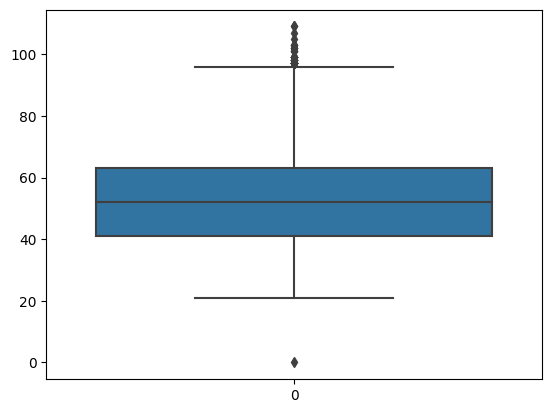

In [43]:
# Let us Plot a box_plot to describe about age.
sns.boxplot(training_dataset_rm['age'])

In [44]:
training_dataset_rm.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [45]:
training_dataset_rm.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [46]:
training_dataset_rm.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In [47]:
# Let us Treat the outliers in above features.
training_dataset_rm[training_dataset_rm['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

In [48]:
training_dataset_rm[training_dataset_rm['NumberOfTimes90DaysLate']>=96]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1733,1,1.0,27,98,0.0,2700.0,0,98,0,98,0.0
2286,0,1.0,22,98,0.0,5400.0,0,98,0,98,0.0
3884,0,1.0,38,98,12.0,5400.0,0,98,0,98,0.0
4417,0,1.0,21,98,0.0,0.0,0,98,0,98,0.0
4705,0,1.0,21,98,0.0,2000.0,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
86166,1,1.0,27,98,22.0,0.0,0,98,0,98,0.0
104482,1,1.0,23,98,0.0,0.0,0,98,0,98,0.0
117001,1,1.0,27,98,15.0,0.0,0,98,0,98,0.0
128624,1,1.0,54,98,0.0,0.0,0,98,0,98,0.0


In [49]:
training_dataset_rm['DebtRatio'].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

<Axes: xlabel='DebtRatio', ylabel='Density'>

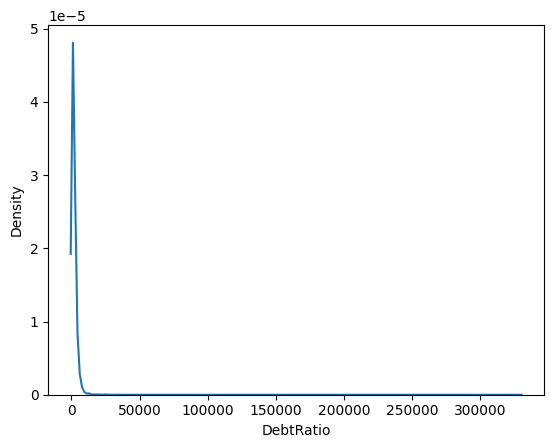

In [50]:
# Let us Plot kdeplot for DebtRatio.
sns.kdeplot(training_dataset_rm['DebtRatio'])

In [51]:
# Let us find the quantile where debt ratio is equal to median.
training_dataset_rm['DebtRatio'].quantile([.978])

0.978    3696.0
Name: DebtRatio, dtype: float64

In [52]:
# Let us find the how many defaulters are there above 0.978 quantile.
training_dataset_rm[training_dataset_rm['DebtRatio']>3696].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    3062
1     219
dtype: int64

In [53]:
training_dataset_rm[training_dataset_rm['DebtRatio']>3696][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3281.000000,3281.000000
mean,0.066748,4807.501067
std,0.249623,1687.983878
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,5400.000000


In [54]:
# Let us check the people who are having DebtRatio > 3696 and target column and Monthly income is equal.
training_dataset_rm[(training_dataset_rm['DebtRatio']>3696) & (training_dataset_rm['SeriousDlqin2yrs'] == training_dataset_rm['MonthlyIncome'])].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,0.006024,0.319344,53.406627,0.216867,6932.652108,0.006024,10.243976,0.033133,2.159639,0.042169,0.527108
std,0.077498,0.461035,11.238436,0.617923,13865.316986,0.077498,5.098201,0.195381,1.412652,0.229341,1.066881
min,0.000000,0.000000,26.000000,0.000000,3697.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.027094,46.000000,0.000000,4184.750000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.184938,52.000000,0.000000,4848.000000,0.000000,9.000000,0.000000,2.000000,0.000000,0.000000
75%,0.000000,0.500467,61.000000,0.000000,5854.000000,0.000000,13.000000,0.000000,3.000000,0.000000,0.000000
max,1.000000,6.425716,84.000000,4.000000,220516.000000,1.000000,31.000000,2.000000,15.000000,2.000000,5.000000


In [55]:
# Let us create a temporary data frame.
temp_dataset=training_dataset_rm[(training_dataset_rm['DebtRatio']>3696) & (training_dataset_rm['SeriousDlqin2yrs'] == training_dataset_rm['MonthlyIncome'])]

In [56]:
# Let us check how many defaulters are there in temporary dataset.
temp_dataset.groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    330
1      2
dtype: int64

In [57]:
# Let us drop the temporary data frame since it has only less defaulters and save as new data frame.
train_dataset=training_dataset_rm.drop(training_dataset_rm[(training_dataset_rm['DebtRatio']>3492) & (training_dataset_rm['SeriousDlqin2yrs'] == training_dataset_rm['MonthlyIncome'])].index)

In [58]:
train_dataset.shape

(148768, 11)

In [59]:
train_dataset.groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    138778
1      9990
dtype: int64

In [60]:
# Let us Install xgboost
#pip install xgboost

In [69]:
# Let us import the libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [63]:
# Let us Split the data frame.
x= train_dataset.drop(['SeriousDlqin2yrs'],axis=1)
y= train_dataset['SeriousDlqin2yrs']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: SeriousDlqin2yrs, dtype: int64

In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [65]:
import xgboost as xgb
from xgboost import XGBClassifier

In [66]:
# Model Training.
xg_model = XGBClassifier()
xg_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
# Model Prediction.
xgb_pred = xg_model.predict(X_test)

In [68]:
# Calculating Metrics
xgb_accuracy = accuracy_score(Y_test, xgb_pred)
print('xgboost model accuracy:',xgb_accuracy)

xgboost model accuracy: 0.9331854540565975


In [71]:
# Calculate precision
precision = precision_score(Y_test, xgb_pred)
print(f'Precision: {precision:.2f}')

Precision: 0.54


In [73]:
# Calculate recall
recall = recall_score(Y_test, xgb_pred)
print(f'Recall: {recall:.2f}')

Recall: 0.19


In [74]:
# Calculate F1-score
f1 = f1_score(Y_test, xgb_pred)
print(f'F1-score: {f1:.2f}')

F1-score: 0.28


In [75]:
# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, xgb_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[27388   325]
 [ 1663   378]]
